### Initial cleaning

In [ ]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [96]:
ratings = pd.read_csv('ratings.csv')
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [97]:
#Will probably disregard this dataframe, doesn't as impactful.
tags = pd.read_csv('tags.csv')
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [44]:
#Unique values in each dataframe
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [43]:
tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [35]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [10]:
#Merge movies and ratings dataframes for easier reference.
df = pd.merge(ratings, movies, on='movieId', how='left')

In [94]:
df.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance


In [12]:
#Drop 'timestamp' as this column is unnecessary
data = df.drop(['timestamp'], axis=1)

In [13]:
#Add a feature 'year' that shows which year the movie is from 
data['year'] = data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [14]:
#Check for NA values 
data.isna().sum()

userId      0
movieId     0
rating      0
title       0
genres      0
year       17
dtype: int64

In [15]:
#Drop any NA values 
data.dropna(inplace=True)

In [16]:
#Confirm all the NA values are removed
data.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [43]:
#See which movie Ids have the highest number of views
data['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
153386      1
57147       1
5986        1
100304      1
8196        1
Name: movieId, Length: 9712, dtype: int64

In [18]:
#See which users have provided the most ratings
data['userId'].value_counts()

414    2697
599    2477
474    2108
448    1863
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [44]:
#View the distribution of ratings 
data['rating'].value_counts()

4.0    26815
3.0    20044
5.0    13207
3.5    13134
4.5     8549
2.0     7550
2.5     5550
1.0     2810
1.5     1791
0.5     1369
Name: rating, dtype: int64

In [20]:
data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [47]:
data['year'].value_counts()

1995         6144
1994         5296
1999         4536
1996         4509
2000         4268
             ... 
1908            1
2006–2007       1
1919            1
1917            1
1915            1
Name: year, Length: 107, dtype: int64

In [46]:
data['year'].nunique()

107

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


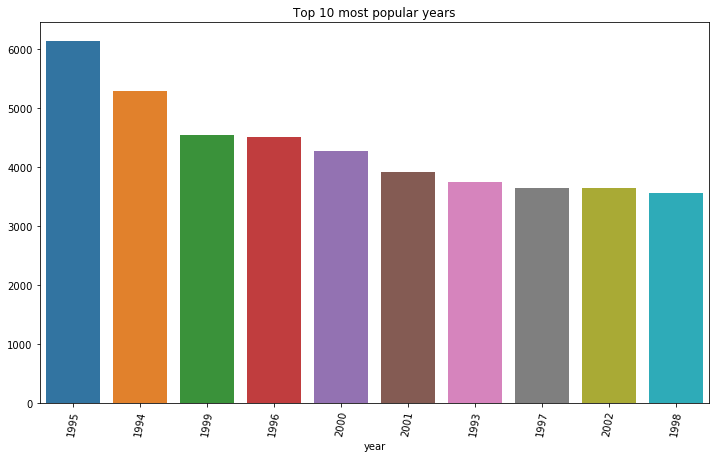

In [53]:
#Top 10 Years with the most movies produced.
plt.figure(figsize=(12,7))
topyear = data.groupby('year').size().sort_values(ascending=False).head(10)
sns.barplot(topyear.index, topyear.values)
plt.title('Top 10 most popular years')
plt.xticks(rotation=80);

In [27]:
#Print the average ratings of movies 
data.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Eichmann (2007)                              5.0
Che: Part One (2008)                         5.0
Sun Alley (Sonnenallee) (1999)               5.0
Priklyucheniya Kapitana Vrungelya (1979)     5.0
The Girls (1961)                             5.0
                                            ... 
Carnival Magic (1981)                        0.5
Case 39 (2009)                               0.5
Wasp Woman, The (1959)                       0.5
Gods of Egypt (2016)                         0.5
Captain America II: Death Too Soon (1979)    0.5
Name: rating, Length: 9707, dtype: float64

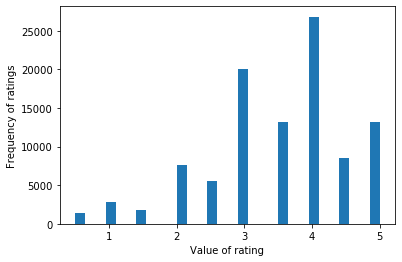

In [21]:
#Plot a histogram of the frequency of certain rating values

plt.hist(data['rating'],bins=30)
plt.xlabel('Value of rating')
plt.ylabel('Frequency of ratings')
plt.show()

In [28]:
# Look at how many times each movie has been watched
data.groupby('title').size().sort_values(ascending=False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Marriage (Hatuna Meuheret) (2001)                                              1
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
'71 (2014)                                                                          1
Length: 9707, dtype: int64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


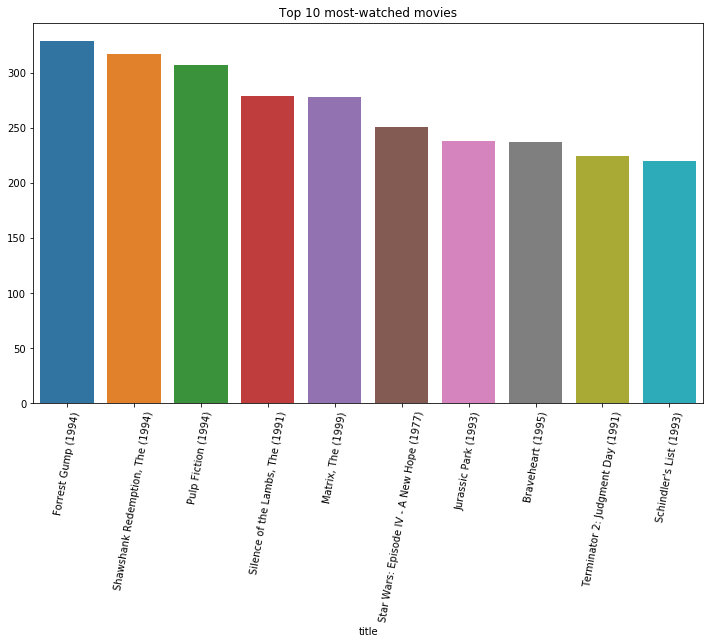

In [31]:
#Plot the top 10 most watched movies
plt.figure(figsize=(12,7))
topmovies = data.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);

In [32]:
#Creat genre labels
genrelabels = set()
for i in data['genres'].str.split('|').values:
    genrelabels = genrelabels.union(set(i))

In [33]:
#Print genres
genrelabels

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [35]:
#Create function that counts how many movies there are of each genre 
def genrecounts(df, col, labels):
    count = dict()
    for i in labels: count[i] = 0
    for value in df[col].str.split('|'):
        if type(value) == float and pd.isnull(value): continue
        for i in value: 
            if pd.notnull(i): count[i] += 1
    return count                                       

In [36]:
genre_count = genrecounts(data, 'genres', genrelabels)
genre_count

{'Film-Noir': 870,
 '(no genres listed)': 38,
 'Fantasy': 11834,
 'Adventure': 24161,
 'Western': 1930,
 'Documentary': 1219,
 'Children': 9208,
 'Horror': 7291,
 'Thriller': 26447,
 'Action': 30631,
 'Crime': 16681,
 'Mystery': 7674,
 'Sci-Fi': 17237,
 'War': 4859,
 'Drama': 41926,
 'IMAX': 4145,
 'Comedy': 39053,
 'Romance': 18124,
 'Animation': 6988,
 'Musical': 4138}

In [37]:
genres = pd.DataFrame(list(genre_count.items()),columns = ['Genre','Frequency']) 

In [38]:
genres = genres.sort_values(by=['Frequency'], ascending=False)

In [39]:
genres

,Genre,Frequency
14,Drama,41926
16,Comedy,39053
9,Action,30631
8,Thriller,26447
3,Adventure,24161
17,Romance,18124
12,Sci-Fi,17237
10,Crime,16681
2,Fantasy,11834
6,Children,9208


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


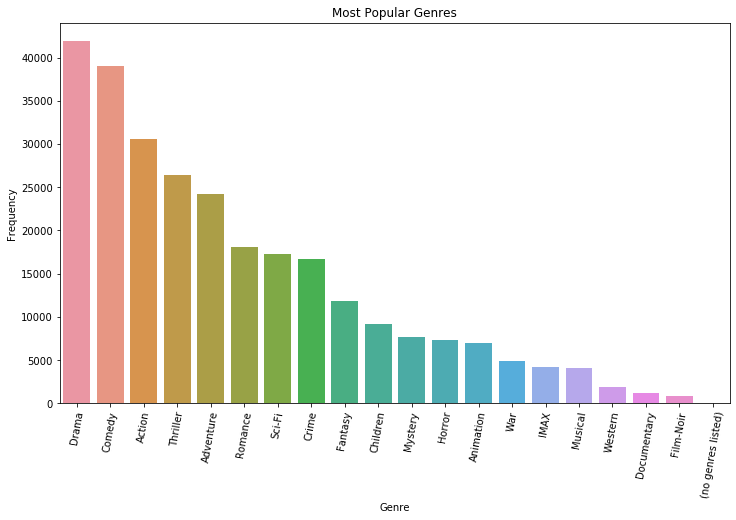

In [42]:
#Plot the top most watched movie genres
plt.figure(figsize=(12,7))
sns.barplot(genres['Genre'], genres['Frequency'])
plt.title('Most Popular Genres')
plt.xticks(rotation=80);

#### Additional EDA

In [58]:
data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [61]:
#Create columns for each genre to indicate T/F
for genre in genrelabels:
    data[genre] = data['genres'].apply(lambda x: genre in x)

In [67]:
#Boolean values for each genre across every movie in the data frame.
pd.set_option('max_columns', None)
data.head(2)

,userId,movieId,rating,title,genres,year,Film-Noir,(no genres listed),Fantasy,Adventure,Western,Documentary,Children,Horror,Thriller,Action,Crime,Mystery,Sci-Fi,War,Drama,IMAX,Comedy,Romance,Animation,Musical
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [120]:
#Create a logical matrix now that the genres have been parsed.
matrix = data.drop(['userId', 'movieId', 'rating', 'genres', 'year', '(no genres listed)'], axis=1)
matrix.head(2)

,title,Film-Noir,Fantasy,Adventure,Western,Documentary,Children,Horror,Thriller,Action,Crime,Mystery,Sci-Fi,War,Drama,IMAX,Comedy,Romance,Animation,Musical
0,Toy Story (1995),False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1,Grumpier Old Men (1995),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [159]:
#Create a loop that will plot the top 10 most watched movies.
if gen in genrelabels==matrix.columns:
    x = matrix[(matrix[gen]==True)]   
    for gen in matrix.columns:
        plt.figure(figsize=(8,8))
        topmovies = x.groupby('title').size().sort_values(ascending=False).head(10)
        sns.barplot(topmovies.index, topmovies.values)
        plt.title('Top 10 most-watched '+gen+' movies')
        plt.xticks(rotation=80);
        continue
else:
    pass

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [80]:
#Looking at which movies are most popular in the fantasy genre
fantasy = data[(data['Fantasy']==True)]
fantasy.head(5)

,userId,movieId,rating,title,genres,year,Film-Noir,(no genres listed),Fantasy,Adventure,Western,Documentary,Children,Horror,Thriller,Action,Crime,Mystery,Sci-Fi,War,Drama,IMAX,Comedy,Romance,Animation,Musical
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
22,1,367,4.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,1994,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
35,1,596,5.0,Pinocchio (1940),Animation|Children|Fantasy|Musical,1940,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
38,1,661,5.0,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical,1996,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
39,1,673,3.0,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,1996,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


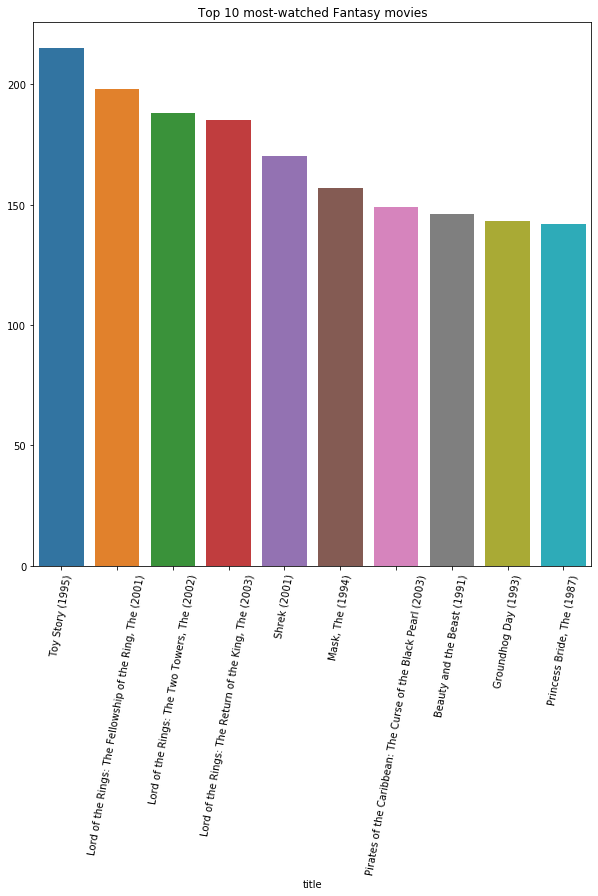

In [165]:
plt.figure(figsize=(10,10))
topmovies = fantasy.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Fantasy movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


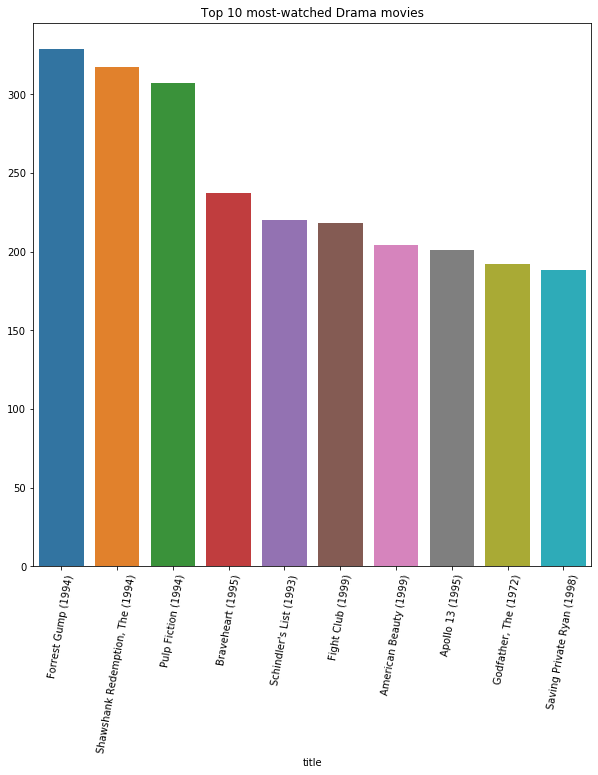

In [124]:
#Looking at which movies are most popular in the Drama genre
drama = data[(data['Drama']==True)]
plt.figure(figsize=(10,10))
topmovies = drama.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Drama movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


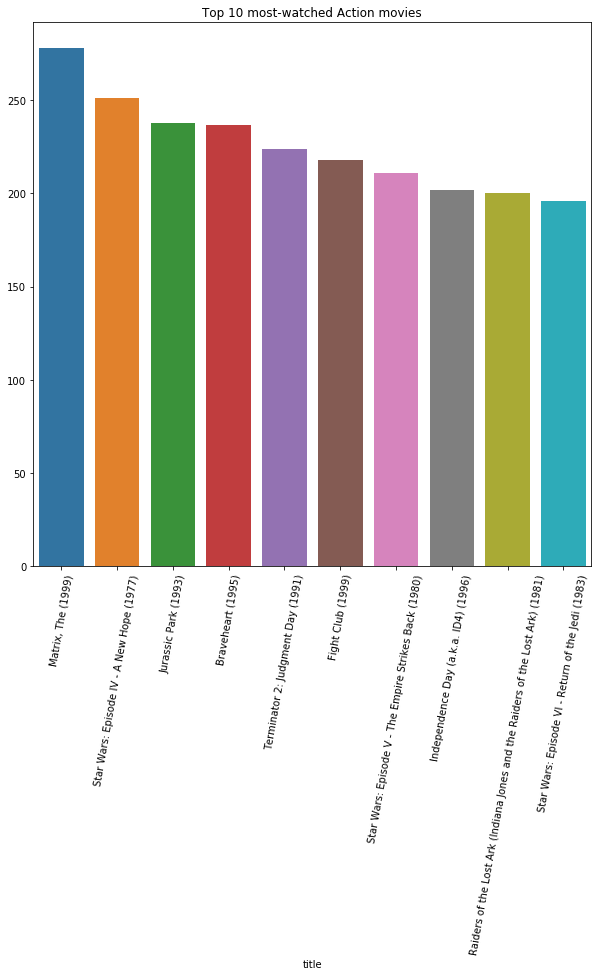

In [125]:
#Looking at which movies are most popular in the Action genre
action = data[(data['Action']==True)]
plt.figure(figsize=(10,10))
topmovies = action.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Action movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


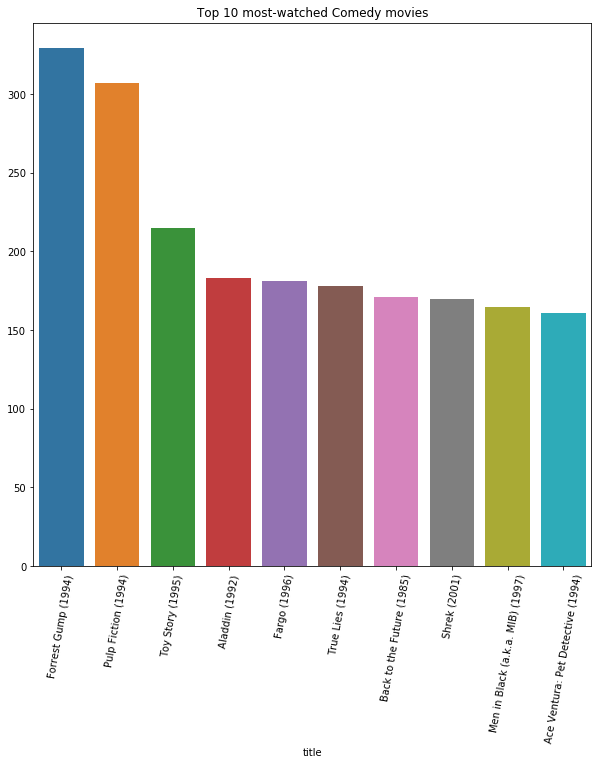

In [161]:
#Looking at which movies are most popular in the Comedy genre
comedy = data[(data['Comedy']==True)]
plt.figure(figsize=(10,10))
topmovies = comedy.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Comedy movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


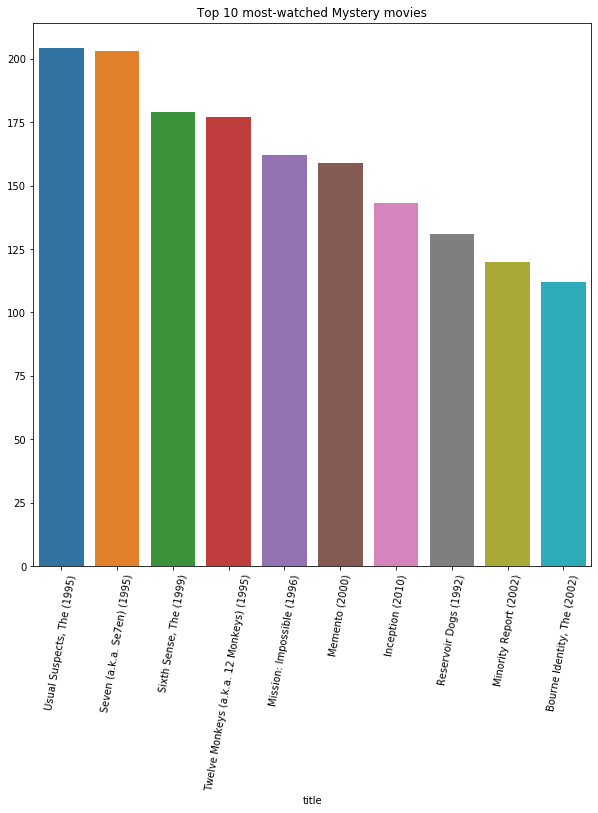

In [163]:
#Looking at which movies are most popular in the Mystery genre
mystery = data[(data['Mystery']==True)]
plt.figure(figsize=(10,10))
topmovies = mystery.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Mystery movies')
plt.xticks(rotation=80);

In [57]:
data.to_csv('cleaneddata')